In [25]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
stress=pd.read_csv(r"C:\Users\DURGA BHAVANI\Downloads\Stress-Lysis1.csv")

In [26]:
df=pd.DataFrame(stress)
print(df)

      Humidity  Temperature  Step count  Stress Level
0        21.33        90.33         123             1
1        21.41        90.41          93             1
2        27.12        96.12         196             2
3        27.64        96.64         177             2
4        10.87        79.87          87             0
...        ...          ...         ...           ...
1997     21.82        90.82          96             1
1998     10.45        79.45          45             0
1999     27.22        96.22         135             2
2000     12.46        81.46          64             0
2001     16.87        85.87          50             1

[2002 rows x 4 columns]


In [30]:
a = df["Humidity"].max()
a

30.0

In [3]:
print(df.head())

   Humidity  Temperature  Step count  Stress Level
0     21.33        90.33         123             1
1     21.41        90.41          93             1
2     27.12        96.12         196             2
3     27.64        96.64         177             2
4     10.87        79.87          87             0


In [4]:
df.corr()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,0.967813,0.870216,0.935237
Temperature,0.967813,1.000000,0.834964,0.895000
Step count,0.870216,0.834964,1.000000,0.832812
Stress Level,0.935237,0.895000,0.832812,1.000000


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,  20., 991., 990.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

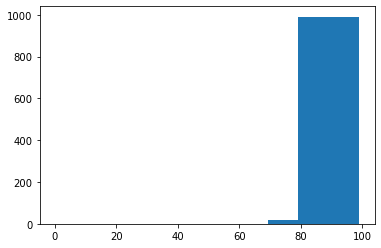

In [5]:
import matplotlib.pyplot as plt
plt.hist(df['Temperature'] )

In [6]:
df[df.Temperature==0]

,Humidity,Temperature,Step count,Stress Level
966,0.0,0.0,0,0


In [7]:
print(df.describe().T)

               count        mean        std  min      25%      50%       75%  \
Humidity      2002.0   19.990010   5.793657  0.0  14.9925   19.995   24.9975   
Temperature   2002.0   88.955544   6.109272  0.0  83.9925   88.995   93.9975   
Step count    2002.0  100.091409  58.211449  0.0  49.2500  101.000  150.0000   
Stress Level  2002.0    1.103896   0.771296  0.0   0.0000    1.000    2.0000   

                max  
Humidity       30.0  
Temperature    99.0  
Step count    200.0  
Stress Level    2.0  


In [8]:
print(df.isnull().sum())

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64


In [9]:
print(df.columns)

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')


In [10]:
print(df.shape)

(2002, 4)


In [11]:
x=df[["Humidity","Temperature"]]
y=df["Stress Level"]
print(x)
print(y)

      Humidity  Temperature
0        21.33        90.33
1        21.41        90.41
2        27.12        96.12
3        27.64        96.64
4        10.87        79.87
...        ...          ...
1997     21.82        90.82
1998     10.45        79.45
1999     27.22        96.22
2000     12.46        81.46
2001     16.87        85.87

[2002 rows x 2 columns]
0       1
1       1
2       2
3       2
4       0
       ..
1997    1
1998    0
1999    2
2000    0
2001    1
Name: Stress Level, Length: 2002, dtype: int64


In [21]:
df.max()

actual       2
predicted    2
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
reg.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=reg.predict(x_test)
print(y_pred)
df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
print(df)

[1 1 2 2 1 2 1 2 2 2 2 2 0 2 1 0 0 0 0 2 1 1 2 0 1 2 2 1 1 1 2 1 1 2 1 1 1
 2 0 1 1 2 1 2 2 1 0 1 2 2 2 1 1 2 0 1 2 2 2 0 1 1 1 0 2 0 2 2 2 2 1 2 2 1
 1 1 2 1 2 0 0 2 0 2 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 2 2 2 1 1 0 0 1 1 2 0 2
 1 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 0 1 1 1 1 2 0 1 2 0 2 0 1 1 1 2 2 2 0
 1 2 0 1 1 2 0 1 0 1 1 1 0 2 1 2 2 0 2 1 1 2 2 2 2 0 2 2 0 0 1 0 1 1 1 1 2
 1 2 0 0 2 1 0 2 2 2 1 2 2 0 1 2 1 2 1 0 1 1 2 2 2 1 1 0 2 2 0 0 1 1 1 1 2
 2 1 1 1 1 2 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 2 2 2 1 0 1 2 0 2 1 2 0 0 2 1 1
 1 0 0 2 2 2 1 2 1 1 1 1 1 1 0 1 2 1 1 1 2 1 2 2 1 0 2 2 2 0 2 2 1 2 2 0 0
 0 0 0 2 0 1 1 1 2 2 0 2 1 0 2 2 1 1 1 2 2 1 1 1 0 1 2 2 0 1 2 0 0 0 0 2 2
 2 1 1 1 1 2 0 0 2 2 1 0 0 1 0 2 1 1 1 2 2 2 2 1 1 2 0 1 1 2 2 0 0 1 0 1 1
 2 2 2 1 1 2 0 1 2 1 2 1 1 1 1 2 1 0 1 2 2 2 0 0 2 1 1 0 1 1 1 2 0 2 1 0 0
 0 0 1 0 2 1 1 0 1 1 1 2 0 2 0 0 1 1 1 1 2 2 2 2 0 0 1 0 2 2 0 1 1 2 0 0 1
 0 0 0 0 1 2 2 2 1 1 1 0 0 2 2 2 0 1 1 2 0 0 0 2 0 2 1 1 1 1 2 0 2 1 2 1 1
 2 1 1 2 1 1 1 2 2 2 0 2 

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [16]:
data = pd.DataFrame({'original':y_test , 'predict':y_pred})

In [17]:
data[data['original'] != data['predict']]

,original,predict


In [31]:
t=np.array([[345 ,244 ]])
if(t[0,0]<0 and t[0,1]<0):
    print("not a person")
elif(t[0,0]>35,t[0,1]>120):
    print("This may exist in some extensive cases")
else:
    predictions=reg.predict(t)
    print("stress of the person is: {}".format(predictions))

This may exist in some extensive cases
